# Breast Cancer Classifying

Author: **Marcin Sikorski**<br>
Date: March, 2022

In machine learning and data science, classification is the task of predicting and assigning a discrete class label. An algorithm that is capable of learning a classification predictive model is called a classification algorithm or classifier. Classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. In this notebook, we will demonstrate an example of categorizing class labels to given input features using <code>scikit-learn</code>.

**Dataset Information**<br>
The original Wisconsin Diagnostic Breast Cancer (WDBC) dataset is a classification datum, which records the measurements for breast cancer cases. There are two classes, benign and malignant. The data was found on UCI Machine Learning Repository. Features were computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

**Problem Description**<br>
Based on given continuous variables in this dataset we want to predict whether the diagnosed tumor is non-problematic (benign), or harmful (malignant). For this task we will perform statistical classfication, develop three machine learning models in Python and compare their final metrics.

**Table of Contents:**
1. Loading Dataset and Performing Exploratory Data Analysis
2. Standardizing and Splitting Data
3. k-Nearest Neighbors
4. Binary Logistic Regression
5. Gaussian Naïve Bayes
6. Visualizing Decision Boundaries
7. Summary

### 1. Loading Dataset and Performing Exploratory Data Analysis

We will download data directly from UCI Machine Learning Repository website: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic). There is no header, so we will create a default one.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# import data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, sep=',', header=None)

# create new list of column names
header = []
for i, column in enumerate(df.columns):
    column_name = 'feature_' + str(i)
    header.append(column_name)

# add new column names to dataframe
df.columns = header
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We will remove the first column which contains id's. This attribute does not bring any useful information to our task and we need real-valued features. We will also rename our target data column into <code>diagnosis</code>. To simplify further operations, we will replace string values in this column to numeric values 0 and 1:
* benign as 0,
* malignant as 1.

In [2]:
# drop first column
df.drop(df.columns[0], axis=1, inplace=True)

# rename target column
df = df.rename(columns={'feature_1': 'diagnosis'})

# replace/map values in column
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [3]:
# number of rows and columns
print('Dataframe Size:', df.shape)

# check for duplicates
df.duplicated().value_counts()

Dataframe Size: (569, 31)


False    569
dtype: int64

In [4]:
# basic descriptive statistics about dataframe ('count' column should display missing values)
df.describe().applymap('{:.4f}'.format).T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0000,0.3726,0.4839,0.0000,0.0000,0.0000,1.0000,1.0000
feature_2,569.0000,14.1273,3.5240,6.9810,11.7000,13.3700,15.7800,28.1100
feature_3,569.0000,19.2896,4.3010,9.7100,16.1700,18.8400,21.8000,39.2800
feature_4,569.0000,91.9690,24.2990,43.7900,75.1700,86.2400,104.1000,188.5000
feature_5,569.0000,654.8891,351.9141,143.5000,420.3000,551.1000,782.7000,2501.0000
feature_6,569.0000,0.0964,0.0141,0.0526,0.0864,0.0959,0.1053,0.1634
feature_7,569.0000,0.1043,0.0528,0.0194,0.0649,0.0926,0.1304,0.3454
feature_8,569.0000,0.0888,0.0797,0.0000,0.0296,0.0615,0.1307,0.4268
feature_9,569.0000,0.0489,0.0388,0.0000,0.0203,0.0335,0.0740,0.2012
feature_10,569.0000,0.1812,0.0274,0.1060,0.1619,0.1792,0.1957,0.3040


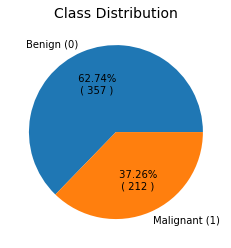

In [5]:
# plot diagnosis distribution
values = df['diagnosis'].value_counts()
labels = ['Benign (0)', 'Malignant (1)']
plt.pie(values, labels=labels, autopct=lambda p: f'{p: .2f}%\n ({p * sum(values) / 100: .0f} )')
plt.title('Class Distribution', size=14)
plt.show()

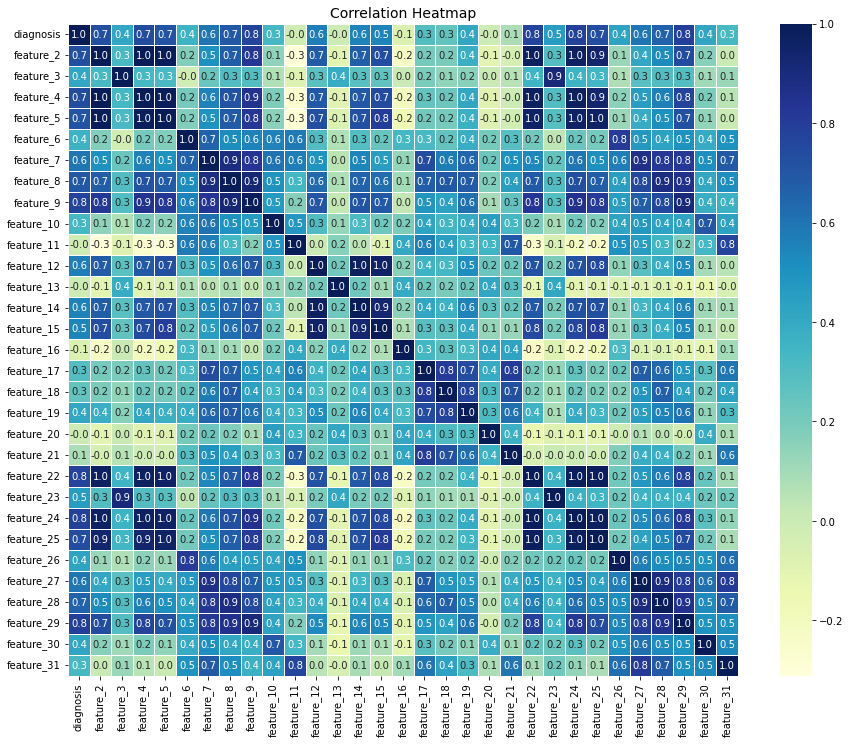

In [6]:
from seaborn import heatmap

# plot correlation matrix
plt.figure(figsize=(15, 12))
heatmap(df.corr(), annot=True, cbar=True, linewidths=.5, fmt='.1f', cmap='YlGnBu') 
plt.title('Correlation Heatmap', size=14)
plt.show()

A correlation heatmap is a matrix that displays a table of the correlation coefficient between two discrete dimensions. Colors represent data from usually a monochromatic scale. It gives us an overview on possible multicollinearity between potential attributes in dataframe. This heatmap can give us information on which factors mostly affect on cancer diagnosis.

### 2. Standardizing and Splitting Data

It is a good practice to scale or standardize the variables (especially for distance-based algorithms - kNN or SVM, which predict the class of a given test observation by identifying the distance between data points). Any variables that are on a large scale will have a much larger effect on the distance between the observations, than variables that are on a small scale. Based on the generated table with descriptive statistics, we can see that our numerical values do not have the same scale. Scaling data can also improve further prediction accuracy.<br>
Next, we will split our dataset into training and validation data with 70:30 ratio and then proceed into developing our classifying models.

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# scale data without target column
sc.fit(df.drop('diagnosis', axis=1))
scaled_features = sc.transform(df.drop('diagnosis', axis=1))

In [8]:
from sklearn.model_selection import train_test_split

X = scaled_features
# target data
y = df['diagnosis']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

# display number of rows
print('Test Data:', np.size(X_test, 0))
print('Train Data:', np.size(X_train, 0))

Test Data: 171
Train Data: 398


### 3. k-Nearest Neighbors

It is a very simple, versatile and easy to understand machine learning algorithm. k-Nearest Neighbor (kNN) is used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. This classifier is based on feature similarity approach. The k-nearest neighbors algorithm strongly depends on *k* value. The number of neighbors is the core deciding factor. Also defining the right distance function is important for the final results.<br>
This dataset is not large and does not have categorical features. Therefore, the kNN method should work well. By default we will accept *k* equal 5.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='minkowski', algorithm='auto')

# fit model
knn.fit(X_train, y_train)
# display parameters
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [10]:
# predict values
pred_knn = knn.predict(X_test)

In [11]:
# missed classified samples
(y_test != pred_knn).sum()

5

In [12]:
# display predict probability for each observation from test set
knn.predict_proba(X_test)

array([[0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [1. ,

#### 3a. Evaluating the Accuracy of kNN Classifier

After devoloping each predictive classification model, we need to evaluate and estimate their performances and applicability, that is how good each model is in predicting the outcome of new observations test data that have been not used to train the model. We will evaluate each machine learning classifier in this project using popular metrics to judge our models: accuracy score, Area Under Curve, confusion matrix, and F1 score. Most of the times the performance of the predictive model can be assessed by comparing the predicted outcome values against the known outcome values.

In [13]:
from sklearn.metrics import accuracy_score

# accuracy scores
print(accuracy_score(y_test, pred_knn, normalize=True))
# alternative method
#print(knn.score(X_test, y_test))
print(knn.score(X_train, y_train))

0.9707602339181286
0.9698492462311558


In [14]:
from sklearn.metrics import precision_score

# precision score
precision_score(y_test, pred_knn)

0.9444444444444444

In [15]:
from sklearn.metrics import f1_score

# F1 score
f1_score(y_test, pred_knn)

0.9532710280373832

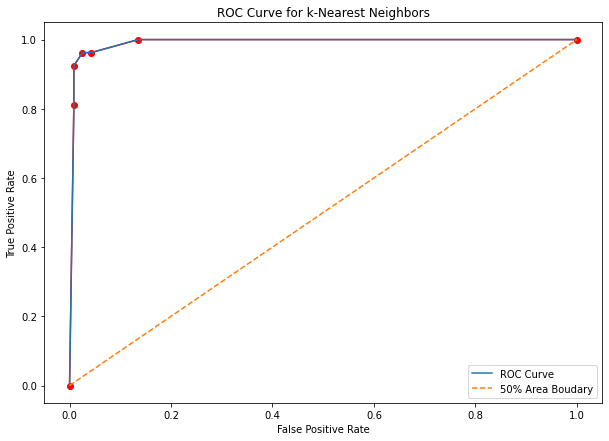

ROC-AUC Score: 0.9684202110649184
AUC Score: 0.9916053725615606
True Positive Rates: [0.         0.81132075 0.9245283  0.96226415 0.96226415 1.
 1.        ]
False Positive Rates: [0.         0.00847458 0.00847458 0.02542373 0.04237288 0.13559322
 1.        ]


In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

knn_test_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_test_proba)

# plot Receiver Operating Characteristic curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='o', color='red')
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0, 1], linestyle='--', label='50% Area Boudary')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for k-Nearest Neighbors', size=12)
plt.legend(loc='lower right')
plt.show()

# display metrics: ROC-AUC score, AUC, TPR and FPR
print('ROC-AUC Score:', roc_auc_score(y_test, pred_knn))
print('AUC Score:', auc(fpr, tpr))
print('True Positive Rates:', tpr)
print('False Positive Rates:', fpr)

The ROC curve (or receiver operating characteristics curve) is a popular graphical measure for assessing the performance or the accuracy of a classifier, which corresponds to the total proportion of correctly classified observations. An ideal ROC curve should have a right angle. The Area Under the Curve (AUC) summarizes the overall performance of the classifier. AUC score in this case is very high. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier. In general, values above 0.80 indicate a good classifier.

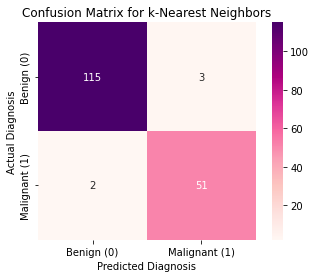

In [17]:
from sklearn.metrics import confusion_matrix

# plot confusion matrix
ax = plt.subplot()
heatmap(confusion_matrix(y_test, pred_knn), cmap='RdPu', square=True, annot=True, fmt='d') 
plt.title('Confusion Matrix for k-Nearest Neighbors')
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
ax.xaxis.set_ticklabels(['Benign (0)', 'Malignant (1)'])
ax.yaxis.set_ticklabels(['Benign (0)', 'Malignant (1)'])
plt.show()

In machine learning and specifically the problem of statistical classification, a confusion matrix (or error matrix) is a specific table layout that allows visualization of the performance of an algorithm. The size of the matrix depends on the number of classes to predict. Each row of the table represents a class while each column represents the instances in a predicted class, or vice versa.<br>
The confusion matrix is easy to read:
1. Diagonally from upper left to lower right, are displayed correctly diagnosed cases.
2. The other quarters show wrong decisions. Upper right quarter - cancer wrongly diagnosed as harmful (type I error), and lower left quarter - cancer wrongly diagnosed as non-problematic (type II error).
3. Adding observations in all quarters will give us the total number of predicted values (the size of validation data).

In [18]:
# summary metrics in one report
import sklearn.metrics as metrics

# summary classification metrics in report
print(metrics.classification_report(y_test, pred_knn, digits=4, target_names=['Benign (0)', 'Malignant (1)']))

               precision    recall  f1-score   support

   Benign (0)     0.9829    0.9746    0.9787       118
Malignant (1)     0.9444    0.9623    0.9533        53

     accuracy                         0.9708       171
    macro avg     0.9637    0.9684    0.9660       171
 weighted avg     0.9710    0.9708    0.9708       171



### 4. Binary Logistic Regression

Logistic regression is another common and widely used classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. This algorithm is fast and relatively uncomplicated. Results are easy to interpret for the user. It uses a sigmoid (logistic) function, that can take any real-valued number and map it into a value between 0 and 1. For example: if our output is 0.80, we can say in terms of probability that there is a 80% chance that patient will suffer from cancer. Another advantage of this method is that it does not require scaling of features.<br>
This model is essentially a method for binary classification (two classes to choose between). Logistic regression works best with smaller datums. The number of attributes (columns) should not cause overfitting. This algorythm should be a great choice to implement.

In [19]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=1.0, solver='liblinear', random_state=0)

# fit model
lgr.fit(X_train, y_train)
# display parameters
lgr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
# predict values
pred_lgr = lgr.predict(X_test)

In [21]:
# missed classified samples
(y_test != pred_lgr).sum()

1

In [22]:
# display predict probability for each observation from test set
lgr.predict_proba(X_test)

array([[2.23910912e-09, 9.99999998e-01],
       [1.72333051e-08, 9.99999983e-01],
       [9.98107900e-01, 1.89210030e-03],
       [1.06499842e-03, 9.98935002e-01],
       [9.99897049e-01, 1.02950608e-04],
       [9.35829226e-01, 6.41707744e-02],
       [9.94721773e-01, 5.27822688e-03],
       [1.26349627e-06, 9.99998737e-01],
       [5.20404555e-03, 9.94795954e-01],
       [9.86290674e-01, 1.37093264e-02],
       [9.99973597e-01, 2.64032225e-05],
       [9.99985005e-01, 1.49948216e-05],
       [7.34820411e-04, 9.99265180e-01],
       [9.98718474e-01, 1.28152552e-03],
       [9.99944622e-01, 5.53776372e-05],
       [5.08603604e-02, 9.49139640e-01],
       [3.07774810e-04, 9.99692225e-01],
       [9.98949214e-01, 1.05078611e-03],
       [6.54828875e-01, 3.45171125e-01],
       [9.82026411e-01, 1.79735895e-02],
       [9.99498970e-01, 5.01029600e-04],
       [9.24792260e-01, 7.52077404e-02],
       [9.99672884e-01, 3.27115638e-04],
       [1.45609655e-03, 9.98543903e-01],
       [9.992158

#### 4a. Evaluating the Accuracy of Logistic Regression Classifier

In [23]:
# accuracy scores
print(accuracy_score(y_test, pred_lgr, normalize=True))
print(lgr.score(X_train, y_train))

0.9941520467836257
0.9824120603015075


In [24]:
# precision score
precision_score(y_test, pred_lgr)

0.9814814814814815

In [25]:
# F1 score
f1_score(y_test, pred_lgr)

0.9906542056074767

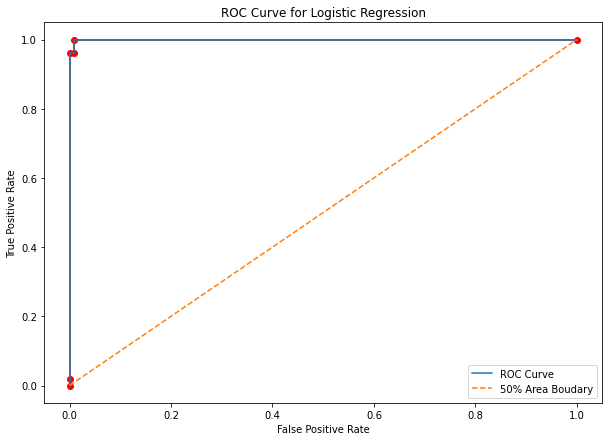

ROC-AUC Score: 0.9957627118644068
AUC Score: 0.9996802046690119
True Positive Rates: [0.         0.01886792 0.96226415 0.96226415 1.         1.        ]
False Positive Rates: [0.         0.         0.         0.00847458 0.00847458 1.        ]


In [26]:
lgr_test_proba = lgr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lgr_test_proba)

# plot Receiver Operating Characteristic curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='o', color='red')
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0, 1], linestyle='--', label='50% Area Boudary')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression', size=12)
plt.legend(loc='lower right')
plt.show()

# display metrics: ROC-AUC score, AUC, TPR and FPR
print('ROC-AUC Score:', roc_auc_score(y_test, pred_lgr))
print('AUC Score:', auc(fpr, tpr))
print('True Positive Rates:', tpr)
print('False Positive Rates:', fpr)

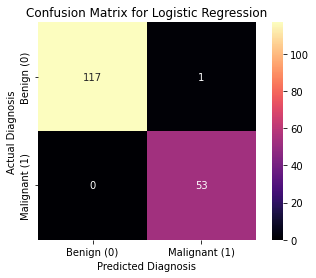

In [27]:
# plot confusion matrix
ax = plt.subplot()
heatmap(confusion_matrix(y_test, pred_lgr), cmap='magma', square=True, annot=True, fmt='d') 
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
ax.xaxis.set_ticklabels(['Benign (0)', 'Malignant (1)'])
ax.yaxis.set_ticklabels(['Benign (0)', 'Malignant (1)'])
plt.show()

In [28]:
# summary classification metrics in report
print(metrics.classification_report(y_test, pred_lgr, digits=4, target_names=['Benign (0)', 'Malignant (1)']))

               precision    recall  f1-score   support

   Benign (0)     1.0000    0.9915    0.9957       118
Malignant (1)     0.9815    1.0000    0.9907        53

     accuracy                         0.9942       171
    macro avg     0.9907    0.9958    0.9932       171
 weighted avg     0.9943    0.9942    0.9942       171



### 5. Gaussian Naïve Bayes

The last and third algorithm which we will implement. Naïve Bayes methods are a set of supervised learning algorithms based on applying Bayes' theorem with the "naïve" assumption of conditional independence between every pair of features given the value of the class variable. Gaussian variant follows Gaussian normal distribution and supports continuous data. This model is versatile, rapid, has a simple design and implementation, and can be applied to many real-life situations. Additionally, naïve Bayes classifiers need small training datasets to estimate the parameters needed for classification. They also work well with enormous amounts of information (features).<br>
Since our dataset contains only real-valued attributes and isn't large, we will classify cancer diagnosis with this method.

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# fit model
gnb.fit(X_train, y_train)
# display parameters
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [30]:
# predict values
pred_gnb = gnb.predict(X_test)

In [31]:
# missed classified samples
(y_test != pred_gnb).sum()

10

In [32]:
# display probability of each class
print('Benign:', gnb.class_prior_[0])
print('Malignant:', gnb.class_prior_[1])

Benign: 0.6005025125628141
Malignant: 0.39949748743718594


In [33]:
# display predict probability for each observation from test set
gnb.predict_proba(X_test)

array([[1.65449780e-111, 1.00000000e+000],
       [7.59640272e-091, 1.00000000e+000],
       [1.00000000e+000, 3.84371718e-015],
       [6.20656601e-025, 1.00000000e+000],
       [1.00000000e+000, 8.41130248e-014],
       [9.99998333e-001, 1.66670967e-006],
       [1.00000000e+000, 2.05866674e-015],
       [8.15024707e-054, 1.00000000e+000],
       [4.29016771e-016, 1.00000000e+000],
       [1.00000000e+000, 7.45216380e-013],
       [1.00000000e+000, 7.78284160e-019],
       [1.00000000e+000, 1.81766651e-018],
       [5.72384149e-023, 1.00000000e+000],
       [1.00000000e+000, 1.34625272e-012],
       [1.00000000e+000, 4.58693907e-018],
       [3.30731293e-011, 1.00000000e+000],
       [4.18766767e-091, 1.00000000e+000],
       [1.00000000e+000, 5.08597259e-015],
       [2.88037473e-002, 9.71196253e-001],
       [1.00000000e+000, 4.55702956e-012],
       [1.00000000e+000, 3.73319738e-014],
       [1.00000000e+000, 7.15156383e-013],
       [1.00000000e+000, 8.04155369e-018],
       [2.9

#### 5a. Evaluating the Accuracy of Naïve Bayes Classifier

In [34]:
# accuracy scores
print(accuracy_score(y_test, pred_gnb, normalize=True))
print(gnb.score(X_train, y_train))

0.9415204678362573
0.9422110552763819


In [35]:
# precision score
precision_score(y_test, pred_gnb)

0.9387755102040817

In [36]:
# F1 score
f1_score(y_test, pred_gnb)

0.9019607843137256

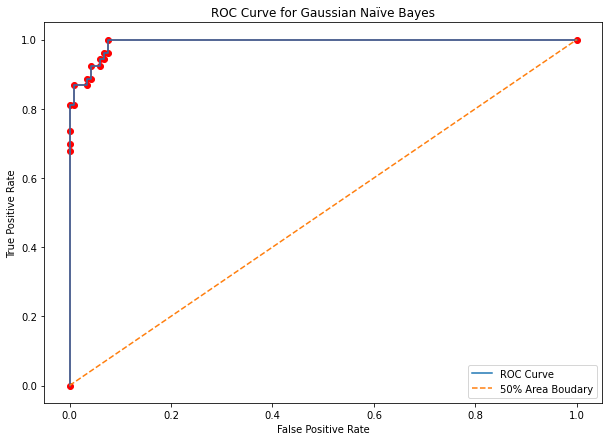

ROC-AUC Score: 0.9212503997441637
AUC Score: 0.9920051167252958
True Positive Rates: [0.         0.67924528 0.69811321 0.73584906 0.81132075 0.81132075
 0.86792453 0.86792453 0.88679245 0.88679245 0.9245283  0.9245283
 0.94339623 0.94339623 0.96226415 0.96226415 1.         1.        ]
False Positive Rates: [0.         0.         0.         0.         0.         0.00847458
 0.00847458 0.03389831 0.03389831 0.04237288 0.04237288 0.05932203
 0.05932203 0.06779661 0.06779661 0.07627119 0.07627119 1.        ]


In [37]:
gnb_test_proba = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, gnb_test_proba)

# plot Receiver Operating Characteristic curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='o', color='red')
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0, 1], linestyle='--', label='50% Area Boudary')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naïve Bayes', size=12)
plt.legend(loc='lower right')
plt.show()

# display metrics: ROC-AUC score, AUC, TPR and FPR
print('ROC-AUC Score:', roc_auc_score(y_test, pred_gnb))
print('AUC Score:', auc(fpr, tpr))
print('True Positive Rates:', tpr)
print('False Positive Rates:', fpr)

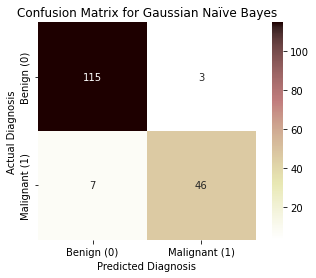

In [38]:
# plot confusion matrix
ax = plt.subplot()
heatmap(confusion_matrix(y_test, pred_gnb), cmap='pink_r', square=True, annot=True, fmt='d') 
plt.title('Confusion Matrix for Gaussian Naïve Bayes')
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
ax.xaxis.set_ticklabels(['Benign (0)', 'Malignant (1)'])
ax.yaxis.set_ticklabels(['Benign (0)', 'Malignant (1)'])
plt.show()

In [39]:
# summary classification metrics in report
print(metrics.classification_report(y_test, pred_gnb, digits=4, target_names=['Benign (0)', 'Malignant (1)']))

               precision    recall  f1-score   support

   Benign (0)     0.9426    0.9746    0.9583       118
Malignant (1)     0.9388    0.8679    0.9020        53

     accuracy                         0.9415       171
    macro avg     0.9407    0.9213    0.9301       171
 weighted avg     0.9414    0.9415    0.9409       171



### 6. Visualizing Decision Boundaries

This time we are going to set new train and test data and implement our three models using the same parameters as previous. Our goal is to plot decision boundaries of our machine learning models to see how these classifiers performed. With practice we can then see the data and understand which model would work best. We wil use the <code>Mlxtend</code> library which was created for plotting different machine learning algorithms and ensemble learning.

In [40]:
# sample data - select 4th and 26th columns
X = df.iloc[:, [3, 25]].values
# target data
y = df.iloc[:, 0].values.astype('int')

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

# scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# train kNN model
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='minkowski', algorithm='auto')
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

# train logistic regression model
lgr = LogisticRegression(C=1.0, solver='liblinear', random_state=0)
lgr.fit(X_train, y_train)
pred_lgr = lgr.predict(X_test)

# train Gaussian naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)

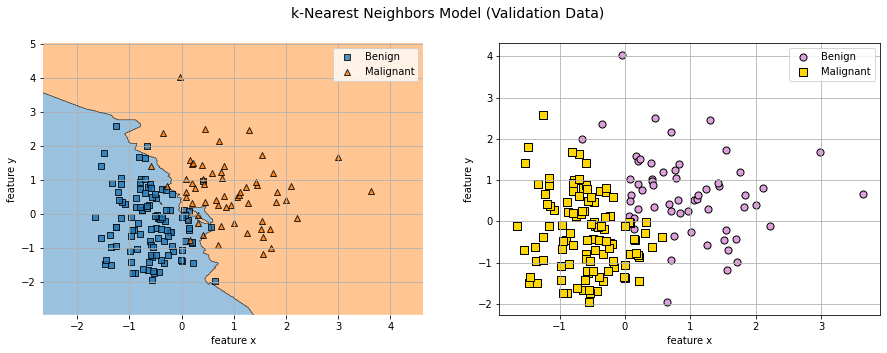

Confusion Matrix:
[[106   6]
 [  6  53]]
Accuracy Score: 0.9298245614035088
Precision Score: 0.8983050847457628
F1 Score: 0.8983050847457628


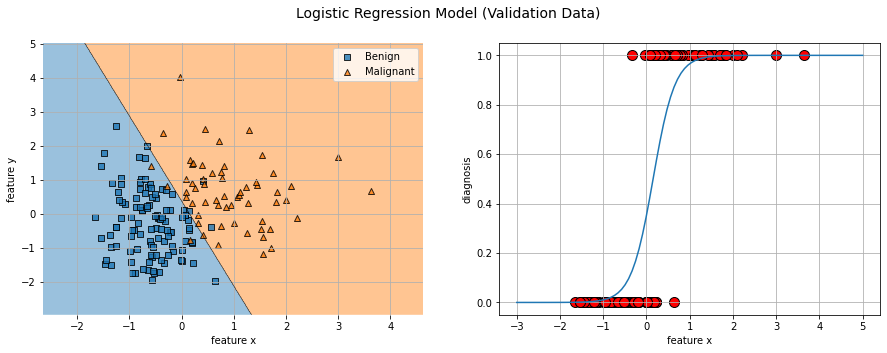

Confusion Matrix:
[[109   3]
 [  3  56]]
Accuracy Score: 0.9649122807017544
Precision Score: 0.9491525423728814
F1 Score: 0.9491525423728814


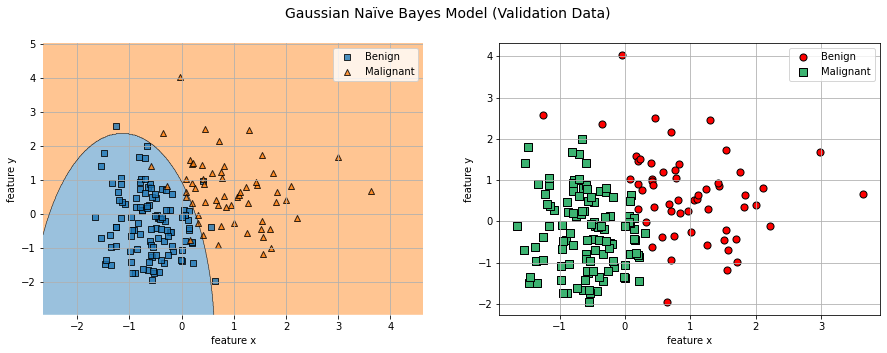

Confusion Matrix:
[[108   4]
 [  6  53]]
Accuracy Score: 0.9415204678362573
Precision Score: 0.9298245614035088
F1 Score: 0.9137931034482759


In [41]:
from mlxtend.plotting import plot_decision_regions

# plot kNN model results
fig = plt.figure(figsize=(15, 5))
fig.suptitle('k-Nearest Neighbors Model (Validation Data)', size=14)
# space between charts
plt.tight_layout(pad=3)

# subplot_1
plt.subplot(1, 2, 1)
plot_decision_regions(X_test, y_test, clf=knn, legend=2)
plt.grid(True)
plt.xlabel('feature x')
plt.ylabel('feature y')
l = plt.legend(loc='best')
l.get_texts()[0].set_text('Benign')
l.get_texts()[1].set_text('Malignant')

# subplot_2
plt.subplot(1, 2, 2)
plt.scatter(x=X_test[pred_knn == 1, 0], y=X_test[pred_knn == 1, 1], s=50, c='plum',
            marker='o', edgecolors='black', label='Benign')
plt.scatter(x=X_test[pred_knn == 0, 0], y=X_test[pred_knn == 0, 1], s=50, c='gold',
            marker='s', edgecolors='black', label='Malignant')
plt.grid(True)
plt.xlabel('feature x')
plt.ylabel('feature y')
plt.legend(loc='best')
plt.show()

# metrics for prediction
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_knn))
print('Accuracy Score:', accuracy_score(y_test, pred_knn))
print('Precision Score:', precision_score(y_test, pred_knn))
print('F1 Score:', f1_score(y_test, pred_knn))

#########################################################################

# plot logistic regression model results
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Logistic Regression Model (Validation Data)', size=14)
# space between charts
plt.tight_layout(pad=3)

# subplot_1
plt.subplot(1, 2, 1)
plot_decision_regions(X_test, y_test, clf=lgr, legend=2)
plt.grid(True)
plt.xlabel('feature x')
plt.ylabel('feature y')
l = plt.legend(loc='best')
l.get_texts()[0].set_text('Benign')
l.get_texts()[1].set_text('Malignant')

# subplot_2
plt.subplot(1, 2, 2)

# coefficients
m = lgr.coef_[0,0]
b = lgr.intercept_[0]
# define sigmoid curve
from math import e
lgs_curve = lambda x: 1/(1 + e**(-(m * x + b)))         
x_values = np.linspace(-3, 5, 100)
y_values = lgs_curve(x_values)

# plotting logistic regression results
plt.plot(x_values, y_values)
plt.scatter(x=X_test[:, 0], y=pred_lgr, s=100, marker='o', c='red', edgecolors='black')
plt.grid(True)
plt.xlabel('feature x')
plt.ylabel('diagnosis')
plt.show()

# metrics for prediction
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_lgr))
print('Accuracy Score:', accuracy_score(y_test, pred_lgr))
print('Precision Score:', precision_score(y_test, pred_lgr))
print('F1 Score:', f1_score(y_test, pred_lgr))

#########################################################################

# plot Gaussian Naive Bayes model results
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Gaussian Naïve Bayes Model (Validation Data)', size=14)
# space between charts
plt.tight_layout(pad=3)

# subplot_1
plt.subplot(1, 2, 1)
plot_decision_regions(X_test, y_test, clf=gnb, legend=2)
plt.grid(True)
plt.xlabel('feature x')
plt.ylabel('feature y')
l = plt.legend(loc='best')
l.get_texts()[0].set_text('Benign')
l.get_texts()[1].set_text('Malignant')

# subplot_2
plt.subplot(1, 2, 2)
plt.scatter(x=X_test[pred_gnb == 1, 0], y=X_test[pred_gnb == 1, 1], s=50, c='red',
            marker='o', edgecolors='black', label='Benign')
plt.scatter(x=X_test[pred_gnb == 0, 0], y=X_test[pred_gnb == 0, 1], s=50, c='mediumseagreen',
            marker='s', edgecolors='black', label='Malignant')
plt.grid(True)
plt.xlabel('feature x')
plt.ylabel('feature y')
plt.legend(loc='best')
plt.show()

# metrics for prediction
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_gnb))
print('Accuracy Score:', accuracy_score(y_test, pred_gnb))
print('Precision Score:', precision_score(y_test, pred_gnb))
print('F1 Score:', f1_score(y_test, pred_gnb))

Decision surface is a diagnostic tool for understanding how a classification algorithm divides up the feature space. A decision regions plot is a powerful tool for understanding how a given model understands the prediction task and how it has decided to divide the input feature space by class label. It is interesting to see in depth of how each model classifies boundaries differently. All three models still returned similar results - marker classes.

### 7. Summary

In this repository, we presented binary classification (assigning one of two targets) for predicting cancer diagnosis based on given characteristics. To complete this task we choosed and applied three different classification algorithms using <code>scikit-learn</code> library:
* k-nearest neighbors,
* binary logistic regression,
* Gaussian naïve Bayes.

There is no good theory on how to map algorithms onto problem types. Also, there is no perfect formula or predictive model for every classification challenge. Instead, it is generally recommended that a developer use controlled experiments and discover which algorithm and algorithm configuration results in the best performance for a given classification task. 

Also, classification requires data. It involves looking for patterns, and to find patterns, we need reliable data and observations. While building our model, we assume that we have access to training data - a bunch of observations, where we know the label of each observation. The collection of these pre-classified observations is also called a training set. A classification algorithm is going to analyze the training set, and then come up with a classifier: an algorithm for predicting the category of future observations.

Classifiers are evaluated based on their scores. Below are basic metrics we used to evaluate all three models:

| Classifier | Accuracy Score | Precision Score | Missed Class Samples | AUC Score | F1 Score |
|------------|----------------|-----------------|----------------------|-----------|----------|
| kNN        | 0.9708         | 0.9444          | 5                    | 0.9916    | 0.9533   |
| BLR        | 0.9942         | 0.9815          | 1                    | 0.9997    | 0.9907   |
| GNB        | 0.9415         | 0.9388          | 10                   | 0.9920    | 0.9020   |

In practice, all three classifiers performed very well and are suitable for this dataset to assign breast cancer classes. The best-performing one, based on these metrics, is the logistic regression classifier. Only one observation was wrongly categorized and the ROC curve was almost right-angled. Perhaps this approach is the best choice for categorizing between two labels in real-life healthcare cases.